In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier

In [ ]:
train = pd.read_csv("train.csv")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


In [ ]:
test=pd.read_csv("test.csv")
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2.0,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2.0,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2.0,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2.0,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2.0,STANDING


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(562), object(1)
memory usage: 1.4+ MB
None


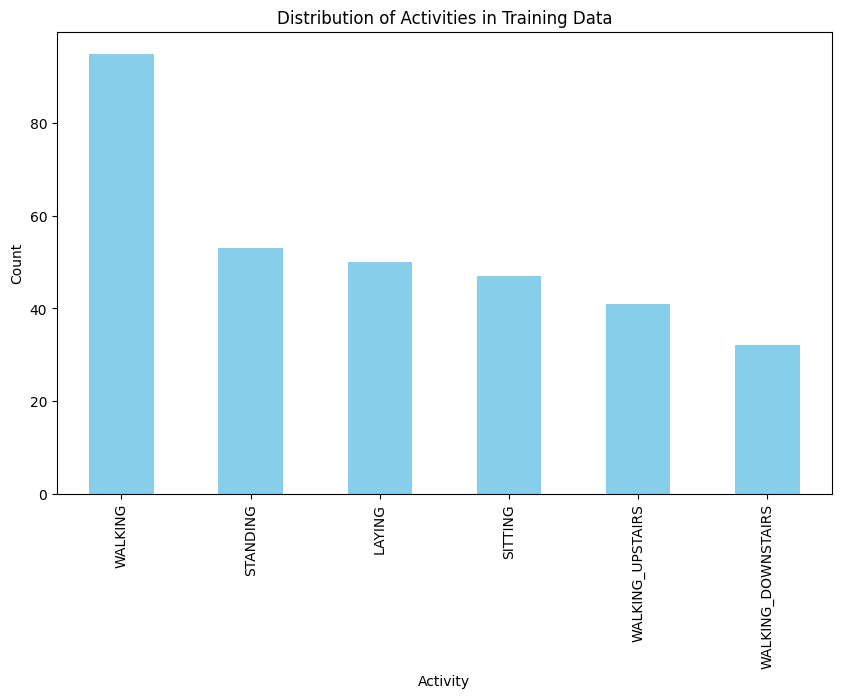

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of classes in the training data
plt.figure(figsize=(10, 6))
train['Activity'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Activities in Training Data')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(562), object(1)
memory usage: 1.4+ MB
None


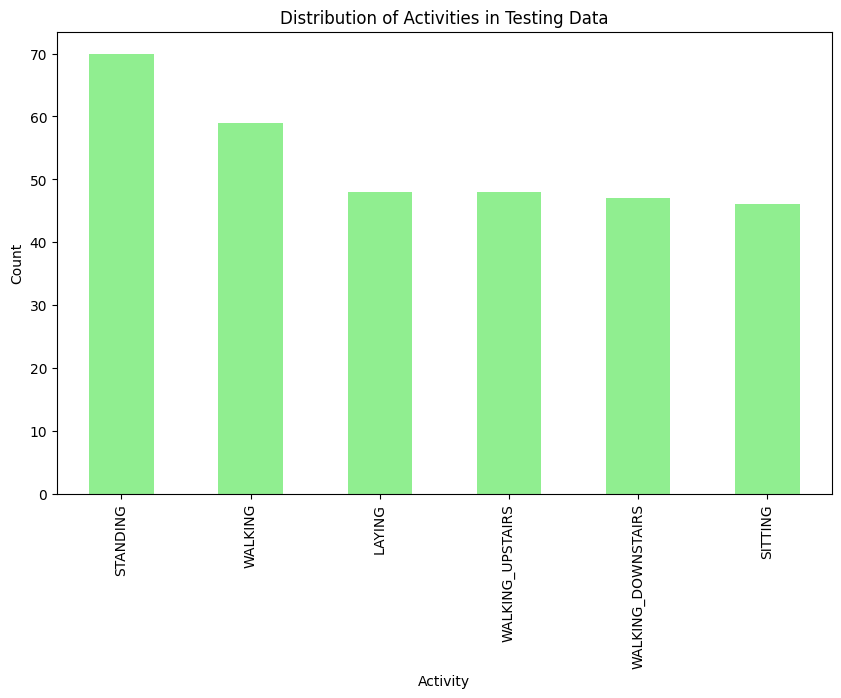

In [ ]:
# Visualize the distribution of classes in the testing data
plt.figure(figsize=(10, 6))
test['Activity'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Activities in Testing Data')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(train, x='Activity', title='Data provided by each user', color="subject")#,pattern_shape="subject"
fig.show()
del fig

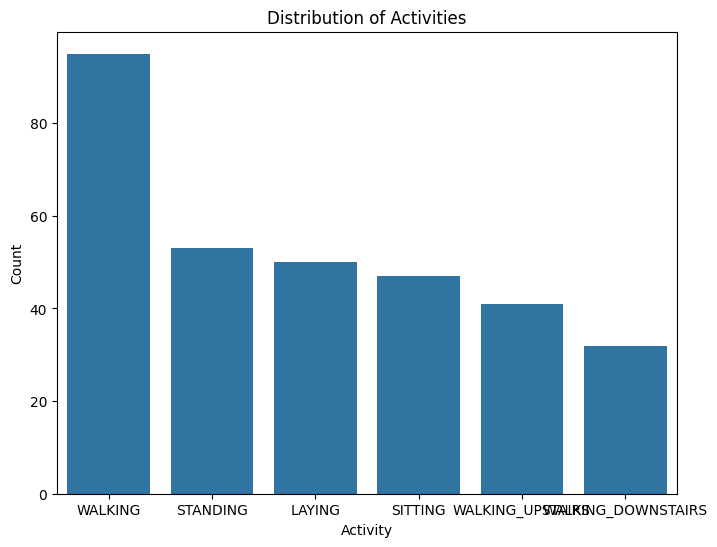

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Activity', data=train, order=train['Activity'].value_counts().index)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

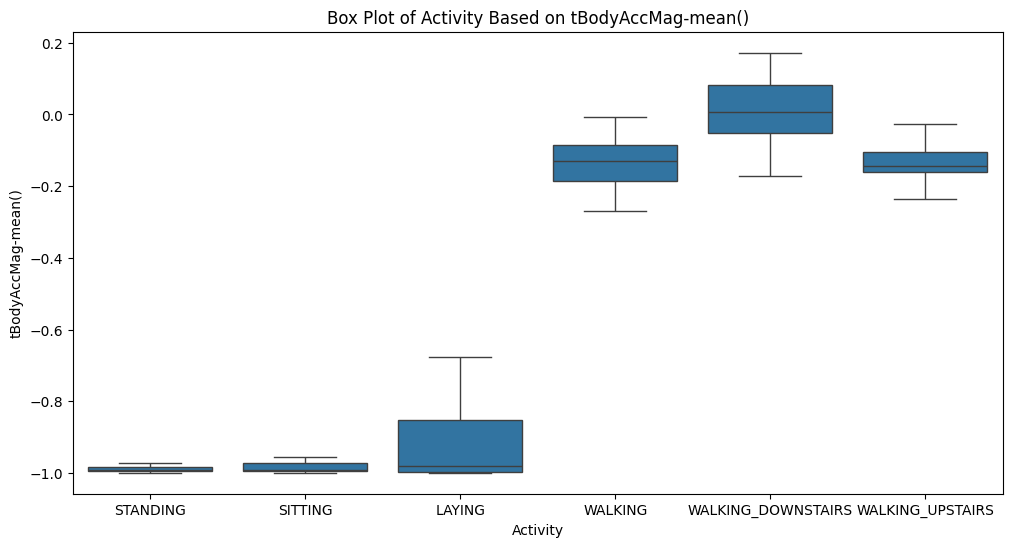

In [ ]:
outcome_column = 'Activity'

# Draw the box plot without scatter points
plt.figure(figsize=(12, 6))
sns.boxplot(x=outcome_column, y='tBodyAccMag-mean()', data=train, showfliers=False)
plt.title('Box Plot of ' + outcome_column + ' Based on tBodyAccMag-mean()')
plt.xlabel(outcome_column)
plt.ylabel('tBodyAccMag-mean()')
plt.show()

In [ ]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [ ]:
print(train.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
subject                 1
Activity                1
Length: 563, dtype: int64


In [ ]:
print(test.isnull().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    1
angle(Y,gravityMean)    1
angle(Z,gravityMean)    1
subject                 1
Activity                1
Length: 563, dtype: int64


In [ ]:
# Identify columns with string values
columns_with_strings = test.select_dtypes(include=['object']).columns.tolist()

# Convert columns with string values to numeric if possible
for col in columns_with_strings:
    test[col] = pd.to_numeric(test[col], errors='coerce')

# Now, fill missing values with the median
test.fillna(test.median(), inplace=True)


In [ ]:
print(test.isnull().sum())

tBodyAcc-mean()-X         0
tBodyAcc-mean()-Y         0
tBodyAcc-mean()-Z         0
tBodyAcc-std()-X          0
tBodyAcc-std()-Y          0
                       ... 
angle(X,gravityMean)      0
angle(Y,gravityMean)      0
angle(Z,gravityMean)      0
subject                   0
Activity                319
Length: 563, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Encode categorical target variable
le = LabelEncoder()
train['Activity'] = le.fit_transform(train['Activity'])

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train.drop(columns=['Activity']))

# Impute missing values in X_train_scaled
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Remove constant features
constant_columns = np.where(X_train_imputed.std(axis=0) == 0)[0]
X_train_imputed = np.delete(X_train_imputed, constant_columns, axis=1)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_imputed, train['Activity'])

# Get the indices of selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the column names of the original dataset
original_feature_names = train.drop(columns=['Activity']).columns

# Get the names of selected features
selected_feature_names = original_feature_names[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature_name in selected_feature_names:
    print(feature_name)


Selected Features:
tBodyAcc-max()-X
tGravityAcc-energy()-X
tBodyAccJerk-std()-X
tBodyAccJerk-mad()-X
tBodyAccJerk-sma()
tBodyGyro-std()-Y
tBodyGyro-mad()-Y
tBodyAccJerkMag-mean()
tBodyAccJerkMag-sma()
fBodyAccJerk-mad()-X


In [ ]:
# Perform train-test split
X_train_selected = train.drop(columns=['Activity'])  # Assuming 'Activity' is the target column
y_train = train['Activity']
X_train, X_val, y_train, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (255, 562) (255,)
Validation set shape: (64, 562) (64,)


In [ ]:
# Perform train-test split
X_train_selected = train.drop(columns=['Activity'])  # Assuming 'Activity' is the target column
y_train = train['Activity']
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (255, 562) (255,)
Testing set shape: (64, 562) (64,)


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.9 MB/s eta 0:00:00


Accuracy of CatBoost: 1.0


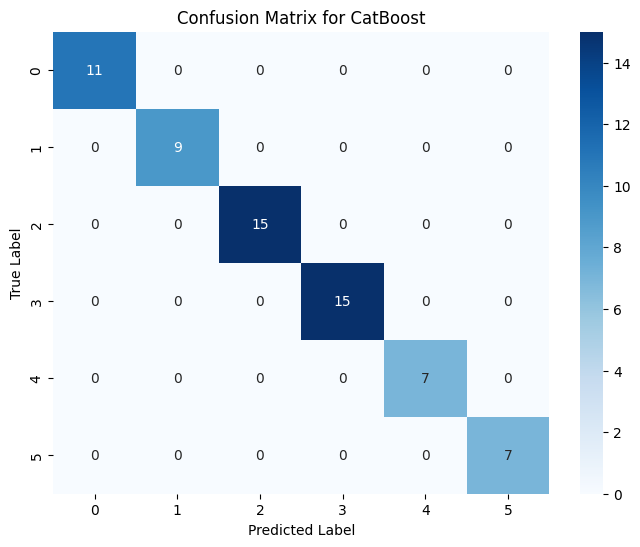

In [ ]:
from catboost import CatBoostClassifier

# Define function to train CatBoost model
def train_catboost_model(X_train, y_train, X_val, y_val, iterations=100, learning_rate=0.1, depth=3):
    catboost_model = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate, depth=depth)
    catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    return catboost_model

# Define function to make predictions using CatBoost model
def predict_catboost_model(model, X_val):
    y_pred = model.predict(X_val)
    return y_pred

# Define function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for CatBoost')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Train CatBoost model
catboost_model = train_catboost_model(X_train, y_train, X_val, y_val)

# Make predictions
y_pred_catboost = predict_catboost_model(catboost_model, X_val)

# Calculate accuracy
accuracy_catboost = calculate_accuracy(y_val, y_pred_catboost)
print("Accuracy of CatBoost:", accuracy_catboost)

# Plot confusion matrix
plot_confusion_matrix(y_val, y_pred_catboost)


Accuracy of CatBoost: 1.0


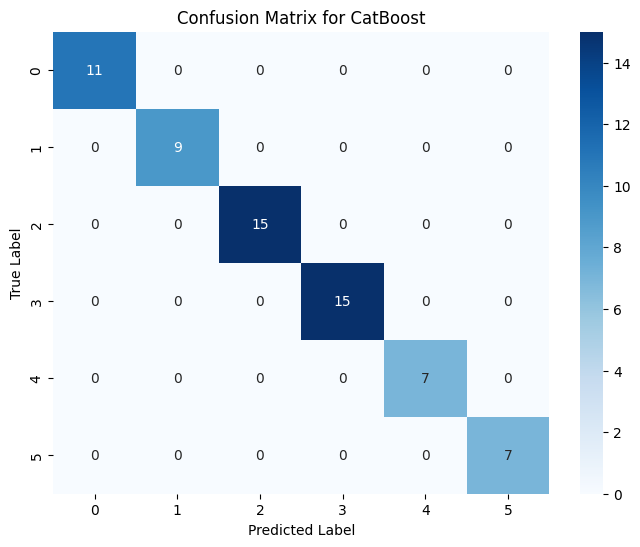

Accuracy of CatBoost with early stopping: 1.0


In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define function to train CatBoost model
def train_catboost_model(X_train, y_train, X_val, y_val, iterations=100, learning_rate=0.1, depth=3):
    catboost_model = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate, depth=depth)
    catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    return catboost_model

# Define function to make predictions using CatBoost model
def predict_catboost_model(model, X_val):
    y_pred = model.predict(X_val)
    return y_pred

# Define function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Define function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix for CatBoost')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Train CatBoost model
catboost_model = train_catboost_model(X_train, y_train, X_val, y_val)

# Make predictions
y_pred_catboost = predict_catboost_model(catboost_model, X_val)

# Calculate accuracy
accuracy_catboost = calculate_accuracy(y_val, y_pred_catboost)
print("Accuracy of CatBoost:", accuracy_catboost)

# Plot confusion matrix
plot_confusion_matrix(y_val, y_pred_catboost)
# Train CatBoost model with early stopping
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, early_stopping_rounds=50)
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)

# Make predictions
y_pred_catboost = catboost_model.predict(X_val)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_val, y_pred_catboost)
print("Accuracy of CatBoost with early stopping:", accuracy_catboost)


In [ ]:
import xgboost as xgb

# Define function to train XGBoost model
def train_xgb_model(X_train, y_train):
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(X_train, y_train)
    return xgb_model

# Define function to make predictions using XGBoost model
def predict_xgb_model(model, X_val):
    y_pred = model.predict(X_val)
    return y_pred

# Train XGBoost model
xgb_model = train_xgb_model(X_train, y_train)

# Make predictions
y_pred_xgb = predict_xgb_model(xgb_model, X_val)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print("Accuracy of XGBoost:", accuracy_xgb)

# Plot confusion matrix
conf_matrix_xgb = confusion_matrix(y_val, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [Ellipsis]

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define function to train QDA model
def train_qda_model(X_train, y_train):
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)
    return qda_model

# Define function to make predictions using QDA model
def predict_qda_model(model, X_val):
    y_pred = model.predict(X_val)
    return y_pred

# Train QDA model
qda_model = train_qda_model(X_train, y_train)

# Make predictions
y_pred_qda = predict_qda_model(qda_model, X_val)

# Calculate accuracy
accuracy_qda = accuracy_score(y_val, y_pred_qda)
print("Accuracy of QDA:", accuracy_qda)

# Plot confusion matrix
conf_matrix_qda = confusion_matrix(y_val, y_pred_qda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_qda, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for QDA')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


ValueError: Expected 2D array, got scalar array instead:
array=Ellipsis.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Accuracy of SVM with SGD: 1.0


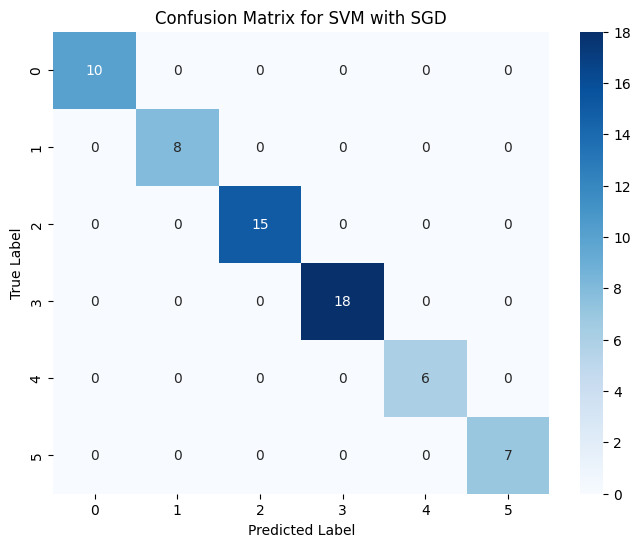

In [ ]:
from sklearn.linear_model import SGDClassifier

# Define function to train SVM with SGD model
def train_svm_sgd_model(X_train, y_train):
    svm_sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
    svm_sgd.fit(X_train, y_train)
    return svm_sgd

# Define function to make predictions using SVM with SGD model
def predict_svm_sgd_model(model, X_val):
    y_pred = model.predict(X_val)
    return y_pred

# Train SVM with SGD model
svm_sgd_model = train_svm_sgd_model(X_train, y_train)

# Make predictions
y_pred_svm_sgd = predict_svm_sgd_model(svm_sgd_model, X_val)

# Calculate accuracy
accuracy_svm_sgd = accuracy_score(y_val, y_pred_svm_sgd)
print("Accuracy of SVM with SGD:", accuracy_svm_sgd)

# Plot confusion matrix
conf_matrix_svm_sgd = confusion_matrix(y_val, y_pred_svm_sgd)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_sgd, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVM with SGD')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define function to train Bagging with Extra Trees model
def train_bagging_model(X_train, y_train):
    base_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, max_samples=0.8, max_features=0.8, random_state=42)
    bagging_classifier.fit(X_train, y_train)
    return bagging_classifier

# Define function to make predictions using Bagging with Extra Trees model
def predict_bagging_model(model, X_val):
    y_pred = model.predict(X_val)
    return y_pred

# Train Bagging with Extra Trees model
bagging_model = train_bagging_model(X_train, y_train)

# Make predictions
y_pred_bagging = predict_bagging_model(bagging_model, X_val)

# Calculate accuracy
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print("Accuracy of Bagging with Extra Trees:", accuracy_bagging)

# Plot confusion matrix
conf_matrix_bagging = confusion_matrix(y_val, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Bagging with Extra Trees')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ValueError: Expected 2D array, got scalar array instead:
array=Ellipsis.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:


# Store accuracies of all models
accuracy_scores = {
    'CatBoost': accuracy_catboost,
    'XGBoost': accuracy_xgb,
    'QDA': accuracy_qda,
    'SVM with SGD': accuracy_svm_sgd,
    'Bagging with Extra Trees': accuracy_bagging
}

# Find the best model
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

# Print accuracies of all models
print("Accuracy scores of all models:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy}")

# Print the best model
print(f"\nThe best model is: {best_model} with accuracy: {best_accuracy}")


Accuracy scores of all models:
CatBoost: 1.0
XGBoost: 0.984375
QDA: 0.5625
SVM with SGD: 1.0
Bagging with Extra Trees: 1.0

The best model is: CatBoost with accuracy: 1.0


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Train LDA model
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform validation data
X_val_lda = lda.transform(X_val)

# Create DataFrame for training data with LDA components
train_lda_df = pd.DataFrame(X_train_lda, columns=['LDA_Component_1', 'LDA_Component_2'])

# Create DataFrame for validation data with LDA components
val_lda_df = pd.DataFrame(X_val_lda, columns=['LDA_Component_1', 'LDA_Component_2'])

print("Training data with LDA components:")
print(train_lda_df)

print("\nValidation data with LDA components:")
print(val_lda_df)



Training data with LDA components:
     LDA_Component_1  LDA_Component_2
0         -62.930968       -16.094458
1         -83.359759        34.547562
2          57.648596         6.269680
3         -85.104365        37.798096
4          43.156335        -6.686878
..               ...              ...
249       -44.536331       -28.979422
250       -83.281035        36.410950
251        58.195017         6.053876
252        56.879104         5.580957
253        57.135794         5.795747

[254 rows x 2 columns]

Validation data with LDA components:
    LDA_Component_1  LDA_Component_2
0        -77.170959        44.991845
1         56.115666         3.529607
2        -36.156610       -35.792459
3         51.571483         4.420721
4        -47.575684       -36.314743
..              ...              ...
59       -78.786718        29.365883
60       -63.215913       -16.779588
61        56.188176         3.710789
62        59.502276         7.164733
63        49.948016         4.874729

[6

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()

# Train XGBoost model using LDA-transformed data
xgb_model.fit(X_train_lda, y_train_final)

# Predict using the trained model on LDA-transformed validation data
y_pred_xgb_lda = xgb_model.predict(X_val_lda)

# Calculate accuracy
accuracy_xgb_lda = accuracy_score(y_val, y_pred_xgb_lda)
print("Accuracy of XGBoost with LDA:", accuracy_xgb_lda)


Accuracy of XGBoost with LDA: 0.6546566961250849


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization advanced

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1.0,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1.0,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1.0,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1.0,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1.0,STANDING


In [ ]:
df_test.shape


(2947, 563)

In [ ]:
df_train.dtypes.value_counts()

float64    562
object       1
Name: count, dtype: int64

In [ ]:
df_train.select_dtypes('int64').head(3)

""
0
1
2


In [ ]:
import re
columns = df_train.columns.to_numpy()


In [ ]:
time_feats = []
time_func = set()
freq_feats = []
freq_func = set()
other_feats = []

n_time = 0
n_freq = 0
n_other = 0

regex_func = re.compile('-([a-z]+)')
regex_axis = re.compile('-([A-Z])')

for i in range(563):
    if np.char.startswith(columns[i],'t'):
        time_feats.append(columns[i])
        time_func.add(regex_func.findall(columns[i])[0])
        n_time += 1
    elif np.char.startswith(columns[i],'f'):
        freq_feats.append(columns[i])
        freq_func.add(regex_func.findall(columns[i])[0])
        n_freq += 1
    else:
        other_feats.append(columns[i])
        n_other += 1

In [ ]:
print('Time freatures:',sorted(time_func))
print('Frequency freatures:',sorted(freq_func))

Time freatures: ['ar', 'correlation', 'energy', 'entropy', 'iqr', 'mad', 'max', 'mean', 'min', 'sma', 'std']
Frequency freatures: ['bands', 'energy', 'entropy', 'iqr', 'kurtosis', 'mad', 'max', 'mean', 'min', 'skewness', 'sma', 'std']


In [ ]:
print('Other features:',sorted(other_feats))

Other features: ['Activity', 'angle(X,gravityMean)', 'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'angle(tBodyAccJerkMean),gravityMean)', 'angle(tBodyAccMean,gravity)', 'angle(tBodyGyroJerkMean,gravityMean)', 'angle(tBodyGyroMean,gravityMean)', 'subject']


In [ ]:
n_time, n_freq, n_other, n_time + n_freq + n_other

(265, 289, 9, 563)

In [ ]:
df_train['Activity'].value_counts()

Activity
STANDING              723
LAYING                689
WALKING               682
SITTING               645
WALKING_UPSTAIRS      578
WALKING_DOWNSTAIRS    525
Name: count, dtype: int64

<ipython-input-14-aa4d326371e7>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  t = chart.set_xticklabels(chart.get_xticklabels(),rotation=25)


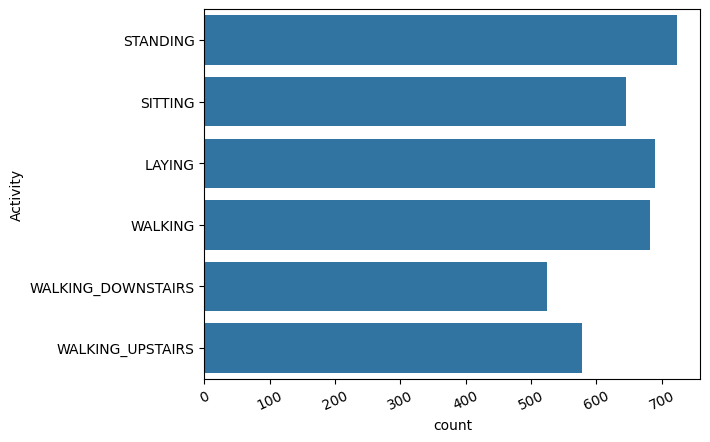

In [ ]:
chart = sns.countplot(df_train['Activity'])
t = chart.set_xticklabels(chart.get_xticklabels(),rotation=25)

In [ ]:
act_map = {'STANDING':0, 'SITTING':1, 'LAYING':2, 'WALKING':3, 'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5}
df_train['activity_code'] = df_train['Activity'].map(act_map)

In [ ]:
df_train['Activity'].value_counts()

Activity
STANDING              723
LAYING                689
WALKING               682
SITTING               645
WALKING_UPSTAIRS      578
WALKING_DOWNSTAIRS    525
Name: count, dtype: int64

In [ ]:
df_train['activity_code'].value_counts()

activity_code
0.0    723
2.0    689
3.0    682
1.0    645
5.0    578
4.0    525
Name: count, dtype: int64

<Axes: >

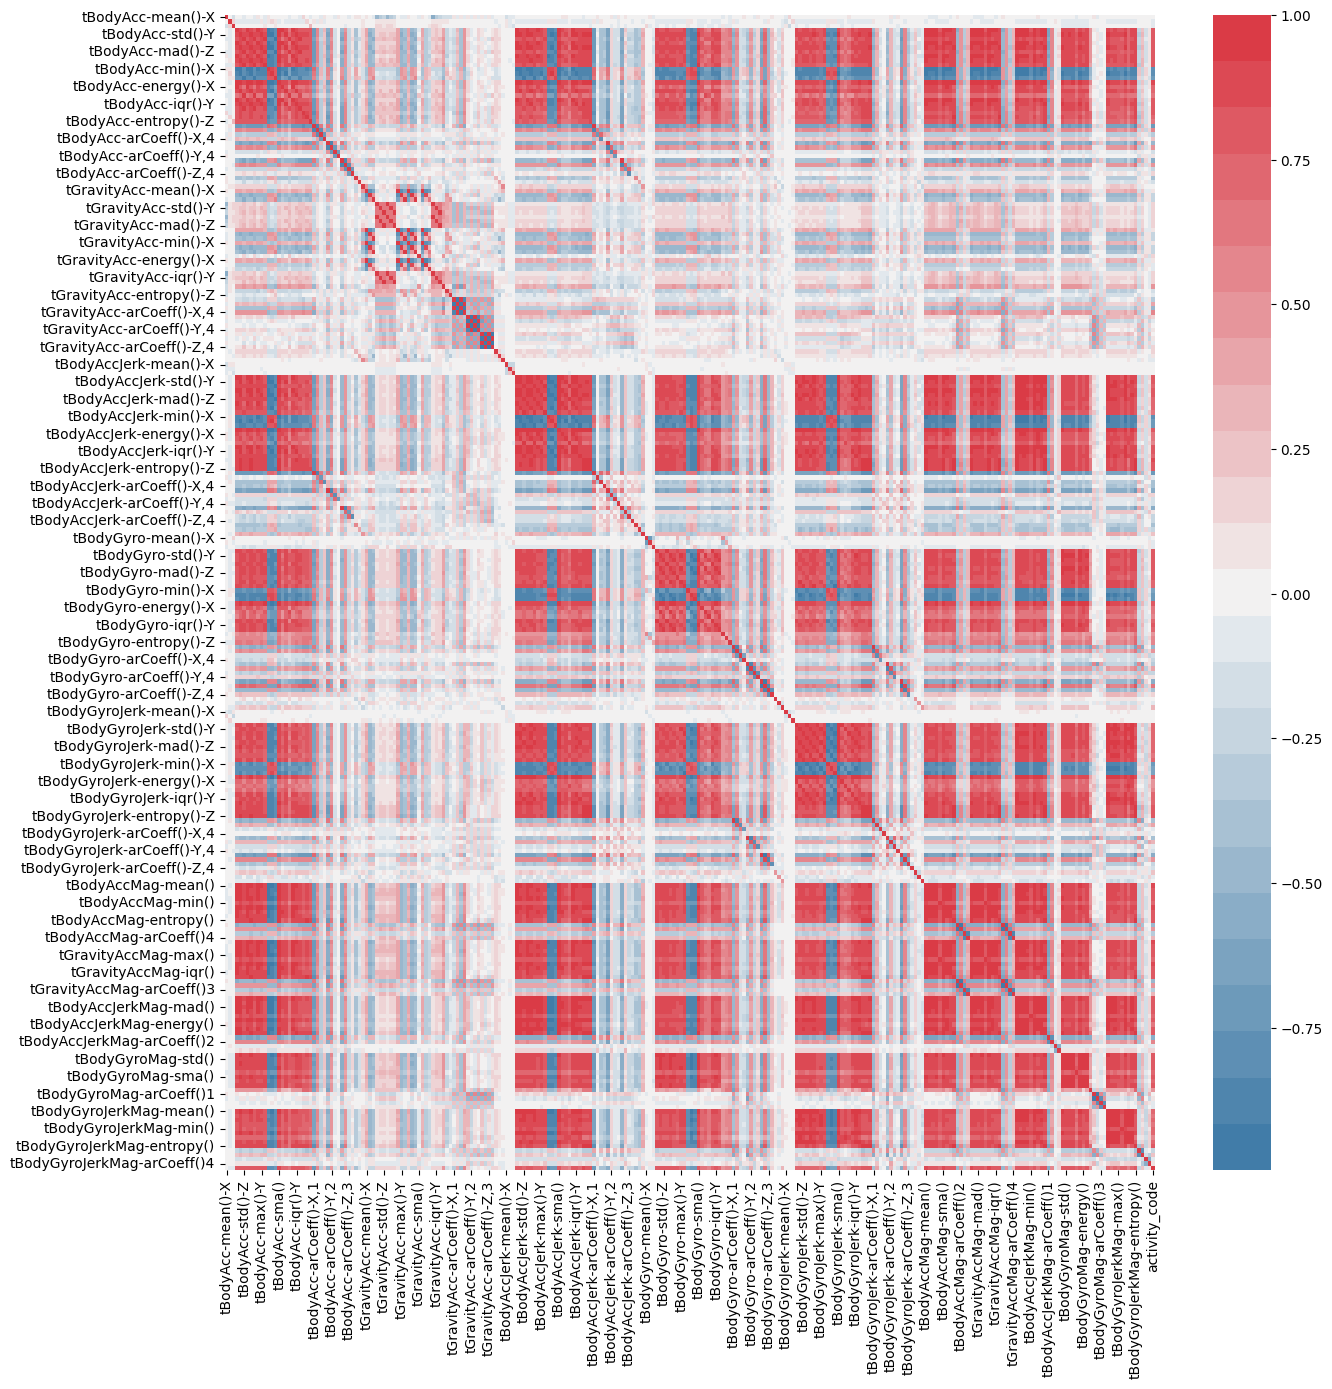

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.heatmap(df_train[time_feats+['activity_code']].corr(),
            cmap=sns.diverging_palette(240, 10, n=25),
            cbar=True,ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [ ]:
df_train.drop(columns=['subject', 'Activity'], inplace=True)

In [ ]:
y = df_train.pop('activity_code')
X = df_train

In [ ]:
X.shape, y.shape

((3843, 561), (3843,))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Check for NaN values in y
nan_indices = np.isnan(y)
print("Indices with NaN values in y:", np.where(nan_indices))

# Handle NaN values in y (replace with 0 for demonstration)
y[nan_indices] = 0  # Replace NaN with 0 (you should choose an appropriate strategy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


Indices with NaN values in y: (array([3842]),)


In [ ]:
X_train.shape, y_train.shape

((3074, 561), (3074,))

In [ ]:
X_test.shape, y_test.shape

((769, 561), (769,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [ ]:
std_scaler = StandardScaler()
X_prep_train = std_scaler.fit_transform(X_train)
X_prep_test = std_scaler.transform(X_test)

In [ ]:
LR_clf = LogisticRegression()
LR_clf.fit(X_prep_train, y_train)

y_pred = LR_clf.predict(X_prep_train)
print(classification_report(y_train, y_pred))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.svm import SVC

# Initialize SVC
svc_clf = SVC()

# Fit the model to your training data
svc_clf.fit(X_prep_train, y_train)

# Make predictions
y_pred_svc = svc_clf.predict(X_prep_train)

# Print classification report for SVC
print(classification_report(y_train, y_pred_svc))


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       145
         1.0       0.94      0.93      0.93       129
         2.0       0.99      1.00      1.00       138
         3.0       1.00      1.00      1.00       136
         4.0       1.00      1.00      1.00       105
         5.0       1.00      1.00      1.00       116

    accuracy                           0.98       769
   macro avg       0.98      0.98      0.98       769
weighted avg       0.98      0.98      0.98       769

Confusion Matrix:
[[137   8   0   0   0   0]
 [  8 120   1   0   0   0]
 [  0   0 138   0   0   0]
 [  0   0   0 136   0   0]
 [  0   0   0   0 105   0]
 [  0   0   0   0   0 116]]


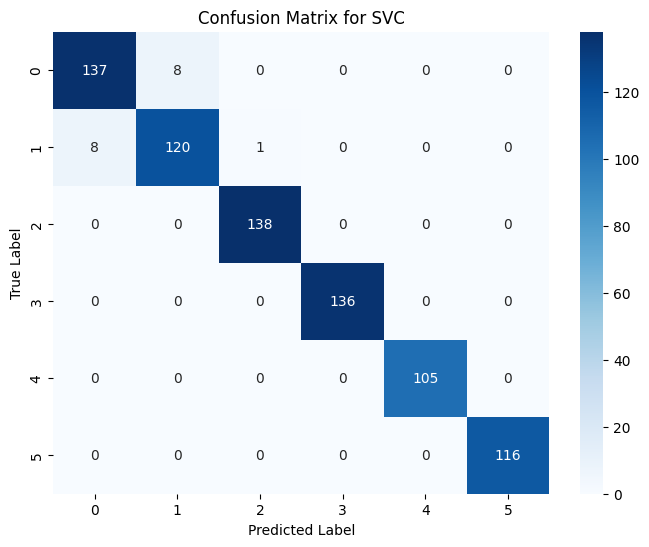

In [ ]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have already imported X, y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Perform any necessary preprocessing on the features (e.g., scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize SVC
svc_clf = SVC()

# Fit the model to your training data
svc_clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred_svc = svc_clf.predict(X_test_imputed)

# Print classification report for SVC on test data
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_svc)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for SVC model
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize Logistic Regression
lr_clf = LogisticRegression()

# Initialize Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Initialize VotingClassifier with Logistic Regression and Decision Tree Classifier
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf)], voting='hard')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have already imported X, y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Perform any necessary preprocessing on the features (e.g., scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies as well
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Initialize Logistic Regression
lr_clf = LogisticRegression()

# Initialize Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Initialize VotingClassifier with Logistic Regression and Decision Tree Classifier
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf)], voting='hard')

# Fit the models to your training data
lr_clf.fit(X_train_imputed, y_train)
dt_clf.fit(X_train_imputed, y_train)
voting_clf.fit(X_train_imputed, y_train)

# Make predictions
y_pred_lr = lr_clf.predict(X_test_imputed)
y_pred_dt = dt_clf.predict(X_test_imputed)
y_pred_voting = voting_clf.predict(X_test_imputed)

# Print classification report for each model
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for SVC model
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       145
         1.0       0.93      0.95      0.94       129
         2.0       1.00      0.99      0.99       138
         3.0       1.00      1.00      1.00       136
         4.0       1.00      1.00      1.00       105
         5.0       1.00      1.00      1.00       116

    accuracy                           0.98       769
   macro avg       0.98      0.98      0.98       769
weighted avg       0.98      0.98      0.98       769

Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       145
         1.0       0.97      0.91      0.94       129
         2.0       1.00      1.00      1.00       138
         3.0       0.93      0.94      0.93       136
         4.0       0.89      0.93      0.91       105
         5.0       0.94      0.89      0.92 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# Impute missing values in the training data
imputer = SimpleImputer(strategy='mean')
X_prep_train_imputed = imputer.fit_transform(X_prep_train)

# Initialize models
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
voting_clf = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf)], voting='hard')

# Fit the models to your training data
lr_clf.fit(X_prep_train_imputed, y_train)
dt_clf.fit(X_prep_train_imputed, y_train)
voting_clf.fit(X_prep_train_imputed, y_train)

# Make predictions on the test data
y_pred_lr = lr_clf.predict(X_prep_test)
y_pred_dt = dt_clf.predict(X_prep_test)
y_pred_voting = voting_clf.predict(X_prep_test)

# Print classification reports
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Voting Classifier:\n", classification_report(y_test, y_pred_voting))

# Print confusion matrices
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Voting Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for SVC model
conf_matrix_decisiontree = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for tre e')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracies on test data
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# Print accuracies
print("Logistic Regression Accuracy:", accuracy_lr)
print("Decision Tree Accuracy:", accuracy_dt)
print("Voting Classifier Accuracy:", accuracy_voting)

# Determine the best accuracy model
best_model = max(accuracy_lr, accuracy_dt, accuracy_voting)
if best_model == accuracy_lr:
    print("Logistic Regression has the best accuracy on the test data.")
elif best_model == accuracy_dt:
    print("Decision Tree has the best accuracy on the test data.")
else:
    print("Voting Classifier has the best accuracy on the test data.")


Logistic Regression Accuracy: 0.19115734720416125
Decision Tree Accuracy: 0.18075422626788037
Voting Classifier Accuracy: 0.17945383615084526
Logistic Regression has the best accuracy on the test data.


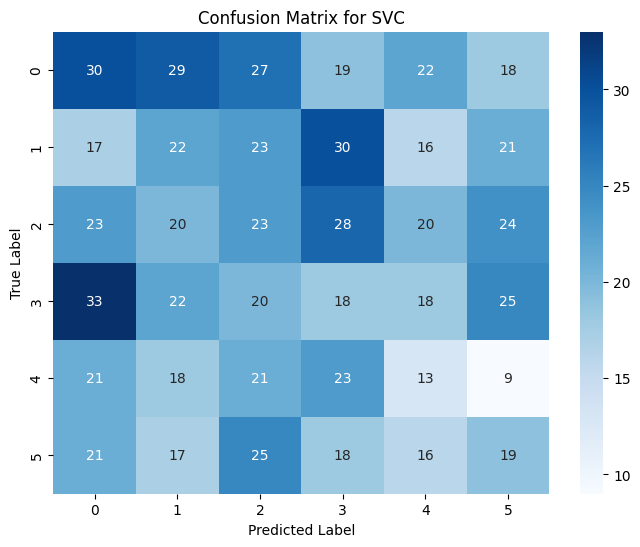

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix for SVC model
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix for SVC
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each classifier
accuracy_svc = accuracy_score(y_test, y_pred_svc)
# Add accuracy calculation for other classifiers if needed

# Create a dictionary to store accuracies
accuracies = {'SVC': accuracy_svc}
# Add accuracies for other classifiers if needed

# Find the classifier with the highest accuracy
best_classifier = max(accuracies, key=accuracies.get)

# Print the highest accuracy and corresponding classifier
print("Highest Accuracy:", accuracies[best_classifier], "from", best_classifier)


Highest Accuracy: 0.1625487646293888 from SVC
